In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Look into twitter text data to predict if the given text has positive or negative
sentiment towards a particular brand. The dataset includes twitter text related to
Apple and Google products with user sentiment ranked between ‘positive’,
‘negative’, ‘neutral’ and ‘no_idea’, sentiments. Create a simpleRNN or LSTM based
classifiers to classify tweets into the four classes. You can avoid
‘emotion_in_tweet_is_directed_at’ column.

# Load the dataset

In [50]:
tweet_prod = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
tweet_prod

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [51]:
tweet_prod.shape

(9093, 3)

In [52]:
#Rename the column 'is_there_an_emotion_directed_at_a_brand_or_product' to 'user sentiment'
tweet_prod = tweet_prod.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'User Sentiment'})

In [53]:
print(tweet_prod.columns)

Index(['tweet_text', 'emotion_in_tweet_is_directed_at', 'User Sentiment'], dtype='object')


In [54]:
#count the values in the column 'User Sentiment'
tweet_prod['User Sentiment'].value_counts()

,count
User Sentiment,
No emotion toward brand or product,5389
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [55]:
tweet_prod.isnull().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
User Sentiment,0


In [56]:
#The column 'emotion_in_tweet_is_directed_at' is unwanted column
tweet_prod = tweet_prod.drop(columns='emotion_in_tweet_is_directed_at')

In [57]:
# After droped
print(tweet_prod.columns)

Index(['tweet_text', 'User Sentiment'], dtype='object')


# Map User Sentiment

In [58]:
tweet_map = {
    'No emotion toward brand or product': 'No_idea',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative',
    "I can't tell": 'Neutral'
}
tweet_prod['User Sentiment'] = tweet_prod['User Sentiment'].map(tweet_map)

In [59]:
# After Mapping
#Count the values in the column 'User Sentiment'
tweet_prod['User Sentiment'].value_counts()

,count
User Sentiment,
No_idea,5389
Positive,2978
Negative,570
Neutral,156


In [60]:
# NO_idea
tweet_prod[tweet_prod['User Sentiment']=='No_idea'].head(5)

,tweet_text,User Sentiment
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No_idea
6,NaN,No_idea
16,Holler Gram for iPad on the iTunes App Store -...,No_idea
32,"Attn: All #SXSW frineds, @mention Register fo...",No_idea
33,Anyone at #sxsw want to sell their old iPad?,No_idea


In [61]:
# Positive
tweet_prod[tweet_prod['User Sentiment']=='Positive'].head(5)

,tweet_text,User Sentiment
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive
7,"#SXSW is just starting, #CTIA is around the co...",Positive
8,Beautifully smart and simple idea RT @madebyma...,Positive


In [62]:
# Negative
tweet_prod[tweet_prod['User Sentiment']=='Negative'].head(5)

,tweet_text,User Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative
3,@sxsw I hope this year's festival isn't as cra...,Negative
17,I just noticed DST is coming this weekend. How...,Negative
38,@mention - False Alarm: Google Circles Not Co...,Negative
64,Again? RT @mention Line at the Apple store is ...,Negative


In [63]:
# Neutral
tweet_prod[tweet_prod['User Sentiment']=='Neutral'].head(5)

,tweet_text,User Sentiment
90,Thanks to @mention for publishing the news of ...,Neutral
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,Neutral
237,Just what America needs. RT @mention Google to...,Neutral
341,The queue at the Apple Store in Austin is FOUR...,Neutral
368,Hope it's better than wave RT @mention Buzz is...,Neutral


# Text Preprocessing
* Removing commas ,
* next line ,
* full stops,
* convert in to lower case

In [64]:
tweet_prod.isnull().sum()

,0
tweet_text,1
User Sentiment,0


In [65]:
tweet_prod['tweet_text'] = tweet_prod['tweet_text'].fillna('')

In [66]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [68]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [69]:
def tweet_clean(text):
  # Remove URLs
  text = re.sub(r'https?://\S+|www\.\S+|\{link\}', '', text)
  # convert in to lower case
  text =text.lower()
  # Remove mentions , hashtags and reserved words
  text = re.sub(r'@\w+|#\w+|rt', '', text)
  # Removing numbers and punctuations
  text =re.sub(r'\d+', '', text)
  # Removing Extra spaces
  text = re.sub(r'\s+', ' ', text).strip()
  # Tokenize and remove stopwords
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join back into a single string
  return ' '.join(words)

In [70]:
sample = "Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh"
print(tweet_clean(sample))

thanks publishing news new medical apps conf. blog


# Apply preprocessing

In [71]:
tweet_prod['tweet_clean'] = tweet_prod['tweet_text'].apply(tweet_clean)

In [72]:
tweet_prod[['tweet_text', 'tweet_clean']].head()

,tweet_text,tweet_clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,". g iphone. hr tweeting , dead! need upgrade. ..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know ? awesome ipad/iphone app likely apprecia...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also. sale .
3,@sxsw I hope this year's festival isn't as cra...,hope year's festival crashy year's iphone app.
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,"great stuff fri : marissa mayer (google), tim ..."


In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

tweet = pd.DataFrame({'sentiment':['Negative','Neutral','No_idea','Positive']})

Labl = LabelEncoder()
tweet['encoded_sentiment'] = Labl.fit_transform(tweet['sentiment'])

print(tweet)

  sentiment  encoded_sentiment
0  Negative                  0
1   Neutral                  1
2   No_idea                  2
3  Positive                  3


# Define X and y

In [74]:
X = tweet_prod['tweet_clean']
y = tweet_prod['User Sentiment']

In [75]:
y

,User Sentiment
0,Negative
1,Positive
2,Positive
3,Negative
4,Positive
...,...
9088,Positive
9089,No_idea
9090,No_idea
9091,No_idea


In [76]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y_encod = label_enc.fit_transform(y)

In [77]:
y_encod

array([0, 3, 3, ..., 2, 2, 2])

# Spliting Data

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encod, test_size=0.2, random_state=42)

In [79]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7274,) (1819,)
(7274,) (1819,)


# Tokenization

In [80]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [81]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [82]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize each tweet
tweet_prod['tokens'] = tweet_prod['tweet_clean'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
print(X_train.shape)
print(y_test.shape)

(7274,)
(1819,)


In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=100)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=100)


LSTM

In [85]:
import numpy as np

X_train_pad = np.array(X_train_pad)
X_test_pad = np.array(X_test_pad)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(4, activation='softmax')  # ← fixed here
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5813 - loss: 0.9787 - val_accuracy: 0.5954 - val_loss: 0.9595
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5822 - loss: 0.9362 - val_accuracy: 0.5954 - val_loss: 0.9235
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5947 - loss: 0.9234 - val_accuracy: 0.5954 - val_loss: 0.9215
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5927 - loss: 0.9185 - val_accuracy: 0.5954 - val_loss: 0.9203
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5931 - loss: 0.9193 - val_accuracy: 0.5954 - val_loss: 0.9269


Simple RNN

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=64),     # Embedding layer
    SimpleRNN(64, return_sequences=False),        # RNN layer
    Dense(4, activation='softmax')                # Output for 4 sentiment classes
])


In [88]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [89]:
model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5712 - loss: 0.9730 - val_accuracy: 0.5954 - val_loss: 0.9257
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5971 - loss: 0.9137 - val_accuracy: 0.5954 - val_loss: 0.9236
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5853 - loss: 0.9329 - val_accuracy: 0.5954 - val_loss: 0.9250
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5879 - loss: 0.9353 - val_accuracy: 0.5954 - val_loss: 0.9196
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5893 - loss: 0.9209 - val_accuracy: 0.5954 - val_loss: 0.9245
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5921 - loss: 0.9301 - val_accuracy: 0.5954 - val_loss: 0.9209
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5950 - loss: 0.9151 - val_accuracy: 0.5954 - val_loss: 0.9207
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5974 - loss: 0.9189 - val_accuracy:

In [90]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5974 - loss: 0.9182
Test Accuracy: 0.5954


Text(0.5, 1.0, 'Label Distribution')

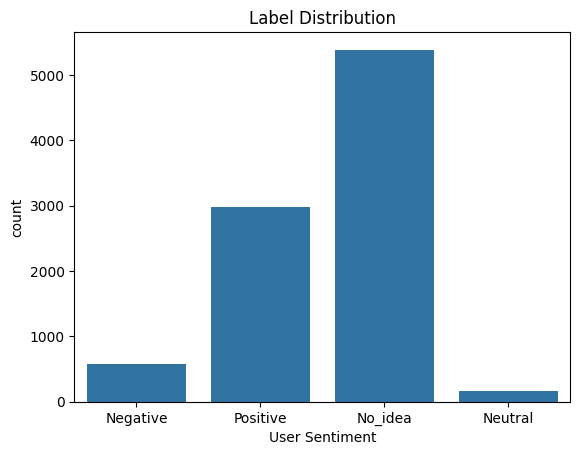

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Label Distribution")

In [118]:
def predict_sentiment(text):
    cleaned = tweet_clean(text)
    sequence = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded)
    predicted_class = prediction.argmax(axis=-1)[0]
    return label_enc.inverse_transform([predicted_class])[0]

# Example usage
predict_sentiment(" hope this year's festival isn't as crashy as this year's iPhone app😡")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'Negative'

In [123]:
print(predict_sentiment("I hope this year's festival isn't as crashy as this year's iPhone app."))      # Expected: Negative
print(predict_sentiment("It's okay, nothing special")) # Expected: Neutral
print(predict_sentiment("Beautifully smart and simple idea RT madebymany thenextweb wrote about our hollergram iPad app for"))   # Expected: Positive
print(predict_sentiment("It's okay, nothing special"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Neutral


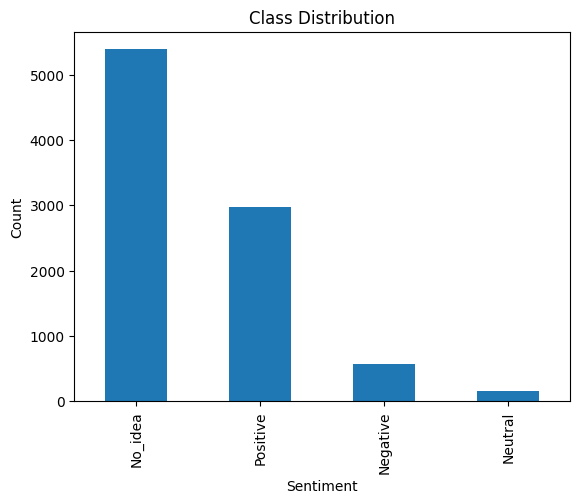

In [94]:
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
